# **PNEUMONIA CLASSIFICATION DEEP LEARNING**

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.style.use('ggplot')

In [3]:
train_dir= './data/chest_Xray/train'
test_dir= './data/chest_Xray/test/'
val_dir= './data/chest_Xray/val/'

In [4]:
img_size=(128,128)
batch_size=32

In [118]:
def get_data(data_dir):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        color_mode='grayscale',
        image_size=(128,128),
        batch_size=32
    )

In [119]:
train = get_data(train_dir)
test = get_data(test_dir)
val = get_data(val_dir)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [120]:
def display_image(dataset):
    plt.figure(figsize= (10,10))
    for images, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
            plt.title(dataset.class_names[labels[i]])
            plt.axis('off')


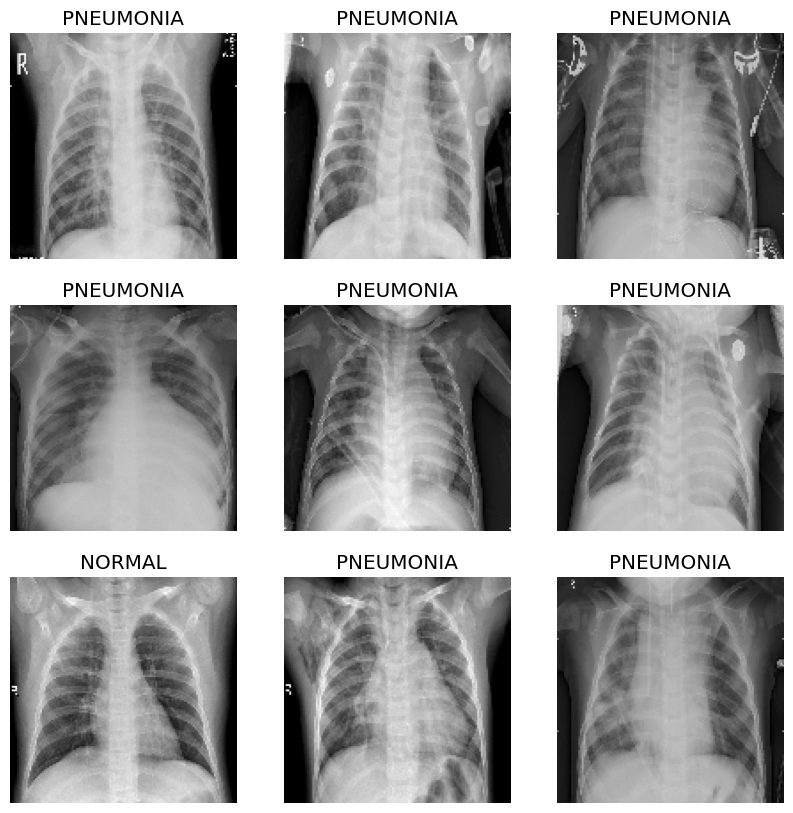

In [121]:
display_image(train)

In [7]:
def plot_distribution(dataset,title):
    labels = []
    for images, lbls in dataset:
        labels.extend(lbls.numpy())

    labels_count = {label: labels.count(label) for label in set(labels)}
    colors = ['skyblue', 'lightcoral']

    plt.bar(labels_count.keys(), labels_count.values(), color=colors)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title(f'Distribution of PNEUMONIA and NORMAL in {title} Dataset')
    plt.xticks(ticks=[0, 1], labels=["NORMAL", "PNEUMONIA"])
    plt.show()

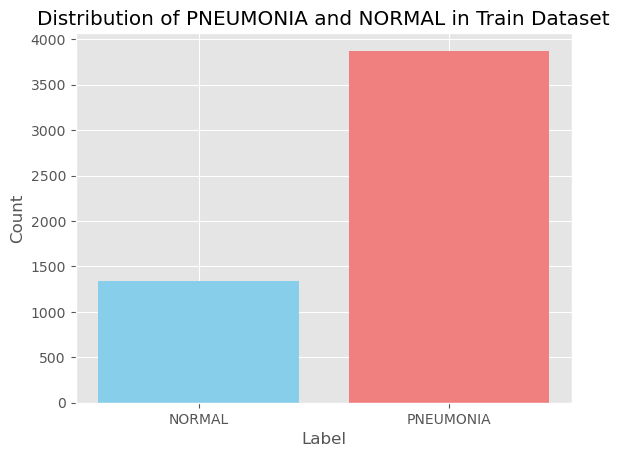

In [137]:
plot_distribution(train, 'Train')

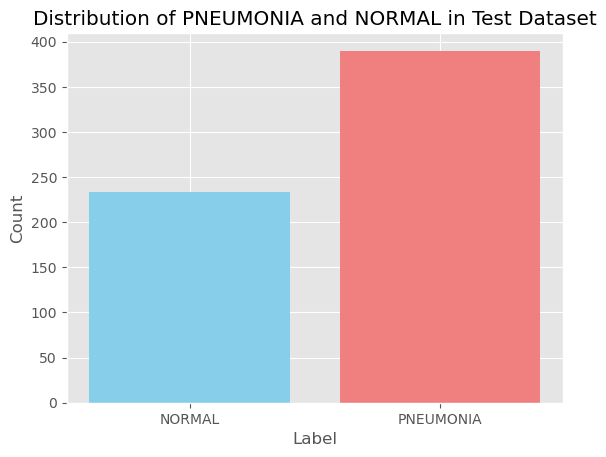

In [138]:
plot_distribution(test, 'Test')

In [123]:
def dataset_to_numpy(dataset):
    images = []
    labels = []

    for batch in dataset:
        batch_images, batch_labels = batch
        images.extend(batch_images.numpy())
        labels.extend(batch_labels.numpy())

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

train_images, train_labels = dataset_to_numpy(train)
val_images, val_labels = dataset_to_numpy(val)
test_images, test_labels = dataset_to_numpy(test)

In [124]:
X = np.concatenate((train_images, val_images, test_images), axis=0)
y = np.concatenate((train_labels, val_labels, test_labels), axis=0)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [126]:
print('Train set shape',X_train.shape)
print('Test set shape',X_test.shape)
print('Target shape',y_train.shape)
print('Target test shape',y_test.shape)

Train set shape (4684, 128, 128, 1)
Test set shape (1172, 128, 128, 1)
Target shape (4684,)
Target test shape (1172,)


In [127]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [128]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1))),
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


C:\Users\hadja\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,984,901 (19.02 MB)

 Trainable params: 1,661,633 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,323,268 (12.68 MB)

In [129]:
import tensorflow.keras as keras

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.F1Score()])

In [130]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_split=0.3)

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.7522 - f1_score: 0.8006 - loss: 12.0744 - recall_6: 0.8203 - val_accuracy: 0.9367 - val_f1_score: 0.8456 - val_loss: 0.1780 - val_recall_6: 0.9447
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.9327 - f1_score: 0.8376 - loss: 0.1597 - recall_6: 0.9559 - val_accuracy: 0.9353 - val_f1_score: 0.8456 - val_loss: 0.1874 - val_recall_6: 0.9379
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9601 - f1_score: 0.8369 - loss: 0.1146 - recall_6: 0.9708 - val_accuracy: 0.9097 - val_f1_score: 0.8456 - val_loss: 0.2692 - val_recall_6: 0.9913
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.9587 - f1_score: 0.8303 - loss: 0.1052 - recall_6: 0.9757 - val_accuracy: 0.9360 - val_f1_score: 0.8456 - val_loss: 0.1934 - val_recall_6: 0.9485
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9691 - f1_score: 0.8388 - loss: 0.0956 - recall_6: 0.9811 - val_accura

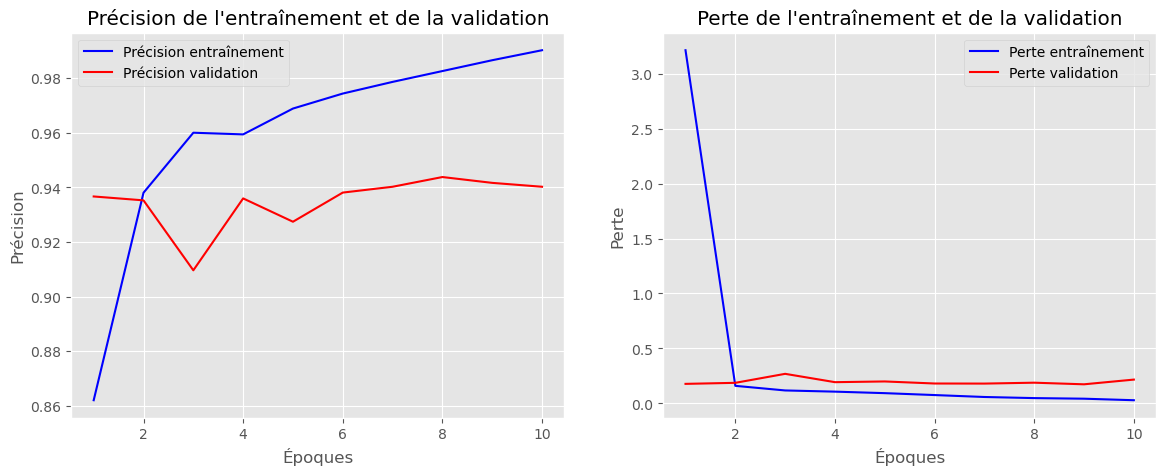

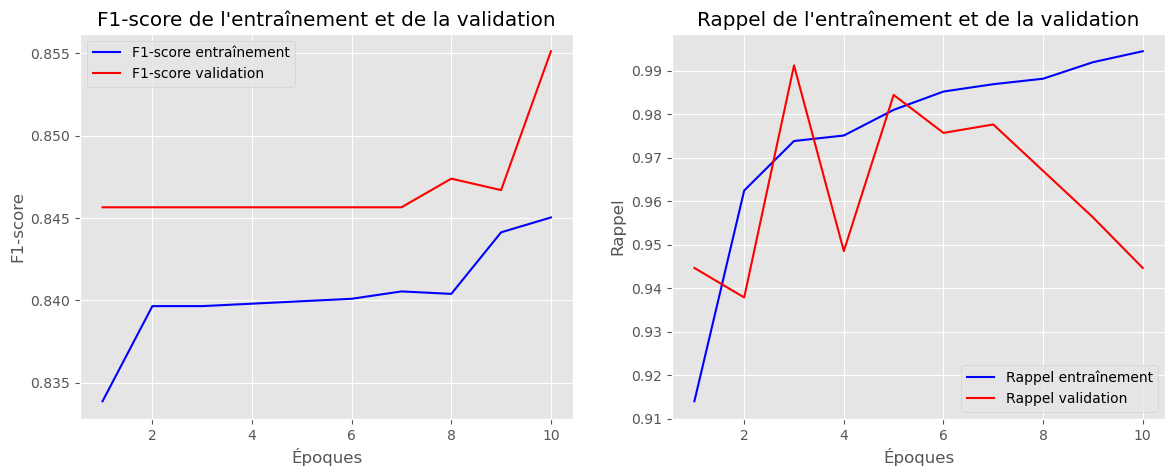

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']
recall = history.history['recall_6']
val_recall = history.history['val_recall_6']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Précision entraînement')
plt.plot(epochs, val_acc, 'r', label='Précision validation')
plt.title('Précision de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Perte entraînement')
plt.plot(epochs, val_loss, 'r', label='Perte validation')
plt.title('Perte de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, f1_score, 'b', label='F1-score entraînement')
plt.plot(epochs, val_f1_score, 'r', label='F1-score validation')
plt.title('F1-score de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('F1-score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, recall, 'b', label='Rappel entraînement')
plt.plot(epochs, val_recall, 'r', label='Rappel validation')
plt.title('Rappel de l\'entraînement et de la validation')
plt.xlabel('Époques')
plt.ylabel('Rappel')
plt.legend()

plt.show()


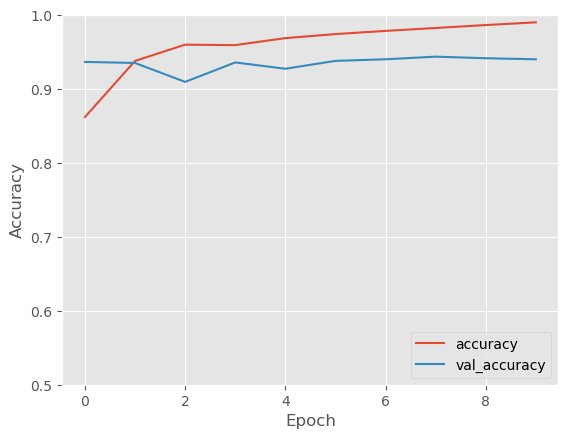

In [144]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Analyse et interprétation

**1. Precision**


La précision pour la classe "NORMAL" est de 0.26, ce qui signifie que parmi les prédictions que le modèle a faites pour cette classe, seulement 26% étaient correctes. Pour la classe "PNEUMONIA", la précision est de 0.00, ce qui signifie que le modèle n'a fait aucune prédiction correcte pour cette classe.



**2. Recall**


Le rappel pour la classe "NORMAL" est de 1.00, ce qui signifie que le modèle a identifié correctement tous les échantillons de cette classe. Pour la classe "PNEUMONIA", le rappel est de 0.00, ce qui signifie que le modèle n'a identifié aucun échantillon de cette classe correctement.



**3. F1-score**

Le F1-score est la moyenne harmonique de la précision et du rappel. Pour la classe "NORMAL", le F1-score est de 0.41, et pour la classe "PNEUMONIA", il est de 0.00.


**Conclusion**


Le modèle a du mal à reconnaître les échantillons de "PNEUMONIA". C'est un signe typique de déséquilibre de classe, où le modèle préfère prédire la classe majoritaire ("NORMAL" dans ce cas).

In [132]:
test_loss, test_accuracy, test_recall, test_f1_score = model.evaluate(X_test, y_test, verbose=2)

37/37 - 2s - 43ms/step - accuracy: 0.9437 - f1_score: 0.8602 - loss: 0.2408 - recall_6: 0.9426


In [133]:
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1_score}')

Test Loss: 0.24075773358345032
Test Accuracy: 0.9436860084533691
Test Recall: 0.9425947070121765
Test F1 Score: 0.8602468967437744


In [134]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [135]:
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test, y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       301
           1       0.98      0.94      0.96       871

    accuracy                           0.94      1172
   macro avg       0.92      0.94      0.93      1172
weighted avg       0.95      0.94      0.94      1172



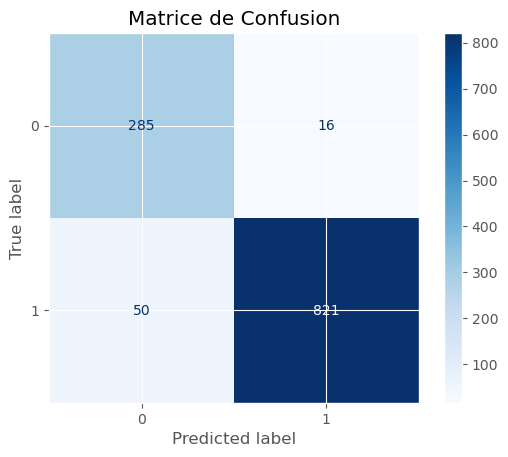

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix=confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)  
plt.title("Matrice de Confusion")
plt.show()

# Analyse et interprétation

La matrice de confusion nous montre les résultats suivants: 

- Vrais positifs: 821
- Vrais négatifs: 285
- Faux positifs: 16
- Faux négatifs: 50

Notre modèle a une très haute précision, ce qui signifie qu'il fait très peu de faux positifs (16 sur 837 prédictions positives).

Il a également un bon rappel, indiquant qu'il fait relativement peu de faux négatives (50 sur 871)

Dès lors, dans le contexte médical, en particulier pour la détection de maladies comme la pneumonie, les faux négatifs peuvent être très problématiques. Un faux négatif signifie que le modèle a prédit qu'une personne n'a pas la pneumonie alors qu'elle en souffre réellement. Cela peut retarder le traitement nécessaire et avoir de graves conséquences pour le patient. Nous devons donc améliorer les perfomances du modèle en réduisant le nombre de faux négatifs.

# **Amélioration des performances du modèle**

**1. Rééchantillonnage : Méthode SMOTE**

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires. Pour éviter de réaliser un simple clonage des individus minoritaires, le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.

In [22]:
!pip install imblearn

In [107]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
